In [56]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
print(tf.__version__)

2.13.0


## Creating data 

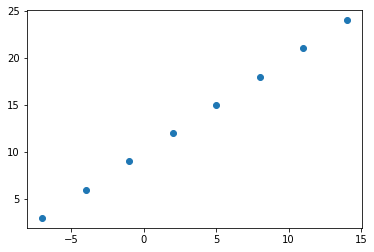

In [57]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [58]:
# Example input and output shapes of regression model
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [59]:
house_info.shape

TensorShape([3])

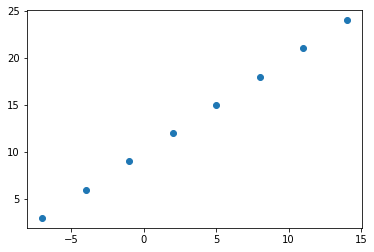

In [60]:
# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [61]:
input_shape = X[0].shape
output_shape = y[0].shape

In [62]:
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modeling with Tensorflow

In [63]:
# Set random model 
tf.random.set_seed(42)

#Creat model using the Sequential
model = tf.keras.Sequential(
   [ tf.keras.layers.Dense(1)]
)

#compile the model 
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

#fit model 
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5 )

Epoch 1/5
1/1 [==============================] - 0s 311ms/step - loss: 20.2545 - mae: 20.2545
Epoch 2/5
1/1 [==============================] - 0s 0s/step - loss: 19.9732 - mae: 19.9732
Epoch 3/5
1/1 [==============================] - 0s 0s/step - loss: 19.6920 - mae: 19.6920
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 19.4107 - mae: 19.4107
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 19.1295 - mae: 19.1295


In [64]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [65]:
# Make a prediction with the model
model.predict([17.0])

1/1 [==============================] - 0s 87ms/step


array([[-19.80026]], dtype=float32)

## Improving a model 

In [66]:
model.fit(tf.expand_dims(X, axis=-1), y, verbose=0, epochs=100)

In [67]:
model.predict([17.0])

1/1 [==============================] - 0s 48ms/step


array([[29.589737]], dtype=float32)

In [68]:
# Make a big dataset
X = np.arange(-100, 100, 4)
print(X)

[-100  -96  -92  -88  -84  -80  -76  -72  -68  -64  -60  -56  -52  -48
  -44  -40  -36  -32  -28  -24  -20  -16  -12   -8   -4    0    4    8
   12   16   20   24   28   32   36   40   44   48   52   56   60   64
   68   72   76   80   84   88   92   96]


In [69]:
y = X +10
print(y)

[-90 -86 -82 -78 -74 -70 -66 -62 -58 -54 -50 -46 -42 -38 -34 -30 -26 -22
 -18 -14 -10  -6  -2   2   6  10  14  18  22  26  30  34  38  42  46  50
  54  58  62  66  70  74  78  82  86  90  94  98 102 106]


## Split data into training and test data

In [70]:
len(X)

50

In [71]:
#Split data into train and tests

X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

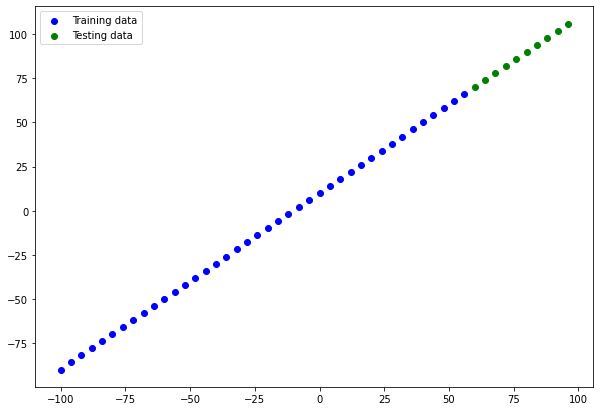

In [72]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [73]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1])
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0) # verbose controls how much gets output

In [75]:
# Check the model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [76]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [77]:
# Make predictions
y_preds = model.predict(X_test)

1/1 [==============================] - 0s 58ms/step


In [78]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # Show the legend
    plt.legend()

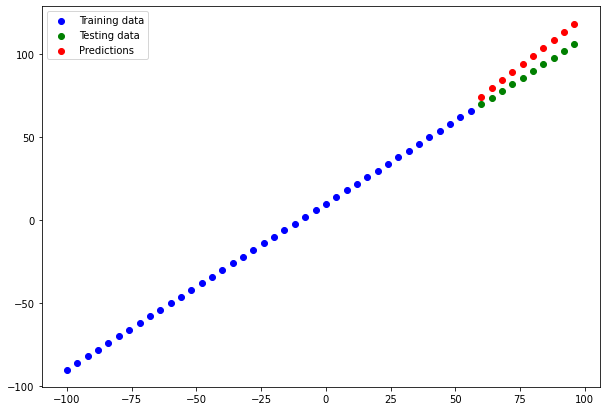

In [79]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

In [80]:
# Evaluate model on test data
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 223ms/step - loss: 8.6063 - mae: 8.6063


[8.606303215026855, 8.606303215026855]

In [82]:
# Calculate the mean absolute error
mae = tf.keras.metrics.mean_absolute_error(y_test, y_preds)
print(mae)

tf.Tensor(
[14.4323015 11.799893  10.322459  10.        10.865033  13.030016
 16.34997   20.824898  25.712341  30.599777 ], shape=(10,), dtype=float32)


In [84]:
# Check the test label tensor values and predictions tensor values
print(y_test)
print(y_preds)

[ 70  74  78  82  86  90  94  98 102 106]
[[ 74.61283 ]
 [ 79.50027 ]
 [ 84.3877  ]
 [ 89.27515 ]
 [ 94.16258 ]
 [ 99.050026]
 [103.93746 ]
 [108.8249  ]
 [113.71234 ]
 [118.59978 ]]


In [86]:
# Check tensor shape
print(y_test.shape, y_preds.shape)

(10,) (10, 1)


In [87]:
# Shape after squeeze()
y_preds.squeeze().shape

(10,)

In [88]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_preds.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=8.606303>

In [89]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=80.56573>

In [90]:
# Returns the same as tf.metrics.mean_absolute_error()
tf.reduce_mean(tf.abs(y_test-y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=8.606303405761718>

In [95]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)
     

## Build Model 1

In [96]:
# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 50ms/step


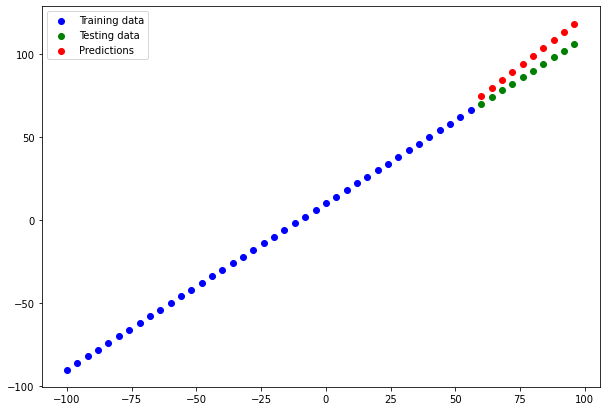

In [97]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [98]:

# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(8.334302, 75.76861)

## Build Model 2

In [101]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
    
    
])
model_2.compile(
    loss=tf.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae', 'mse']
)
# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 48ms/step


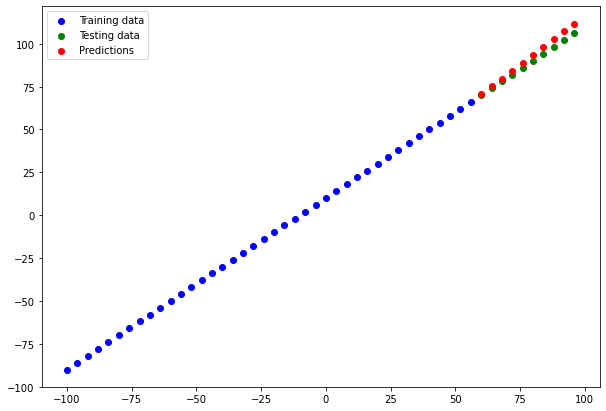

In [102]:

# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [108]:

# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(3.1408134, 12.678411)

## Build model 3

In [104]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0) # set verbose to 0 for less output

1/1 [==============================] - 0s 82ms/step


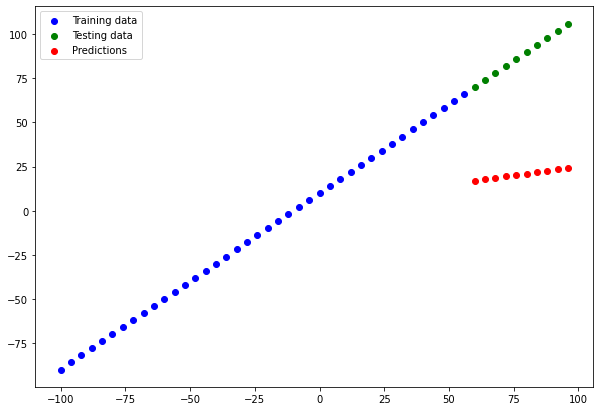

In [105]:

# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [106]:
# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(67.36969, 4621.6147)

## Comparing result of 3 model

In [109]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]

In [110]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,8.334302,75.768608
1,model_2,3.140813,12.678411
2,model_3,67.369690,67.369690


## Saving model

In [111]:
# Save a model using the SavedModel format
model_2.save('model_2_of_reg_SavedModel_format')

INFO:tensorflow:Assets written to: model_2_of_reg_SavedModel_format\assets


INFO:tensorflow:Assets written to: model_2_of_reg_SavedModel_format\assets


In [113]:
# Save a model using the HDF5 format
model_2.save("models/model_2_of_reg.h5") # note the addition of '.h5' on the end

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading model

In [116]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("models/model_2_of_reg_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1)                 2         
                                                                 
 dense_13 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [117]:
# Compare model_2 with the SavedModel version (should return True)
model_2_preds = model_2.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

1/1 [==============================] - 0s 50ms/step


True

In [119]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("models/model_2_of_reg.h5")
loaded_h5_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1)                 2         
                                                                 
 dense_13 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [120]:
# Compare model_2 with the loaded HDF5 version (should return True)
h5_model_preds = loaded_h5_model.predict(X_test)
mae(y_test, h5_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()
     

1/1 [==============================] - 0s 63ms/step


True